In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
outputs = {
    "No Grammar": {'10010': 47, '10000': 2, '10111': 33, '11101': 10, '10110': 178, '11001': 13, 
'11011': 12, '11100': 1, '10101': 68, '10100': 13, '11000': 0, '10011': 61, 
'11110': 2, '11111': 0, '10001': 11, '00000': 0, '11010': 49},
    "GCD: string_01.ebnf": {'10100': 28, '11010': 24, '11101': 6, '11000': 4, '10110': 114, '00000': 0, 
'11111': 0, '11110': 1, '10000': 22, '10101': 68, '11011': 22, '10001': 37, 
'10011': 46, '10111': 61, '10010': 52, '11001': 11, '11100': 4},
    "GCD: string_start_w_1_all_0.ebnf": {'10111': 49, '10001': 27, '10010': 36, '11001': 11, '10011': 32, 
'11110': 1, '10101': 52, '11111': 0, '11101': 9, '00000': 129, '11100': 2, 
'11010': 30, '10110': 74, '10000': 10, '11011': 14, '10100': 24, '11000': 0},
    "GCD: string_start_w_1_all_0_explicit.ebnf": {'10100': 19, '11001': 9, '10110': 81, '10101': 48, '10000': 11, 
'10010': 27, '10111': 41, '11101': 2, '00000': 147, '11010': 27, 
'11000': 1, '11100': 1, '10001': 41, '11011': 14, '11111': 0, '10011': 28, '11110': 3},
    "Grammar prompt: string_start_w_1_all_0.ebnf": {'10111': 12, '11000': 3, '11110': 19, '10011': 15, '11111': 253, '00000': 68, 
'10000': 5, '11011': 11, '10001': 4, '10010': 6, '10110': 29, '10101': 44, 
'10100': 7, '11001': 13, '11100': 0, '11010': 11, '11101': 0}
}

In [3]:
def plot_outputs_method(outputs):
    # Set up the figure and axis for the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Iterate over outputs to plot each as a separate stacked bar
    for i, (method, output) in enumerate(outputs.items(), 1):
        labels = list(output.keys())
        values = list(output.values())
        bottom = 0  # Starting point for the first bar
        
        for label, value in zip(labels, values):
            ax.bar(method, value, bottom=bottom, label=label if i == 1 else "", edgecolor='white')
            bottom += value
    
    # Add legend outside of the plot
    ax.legend(title="Binary Strings", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set labels and title
    plt.ylabel('Counts')
    plt.title('Output Distribution by Method')
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

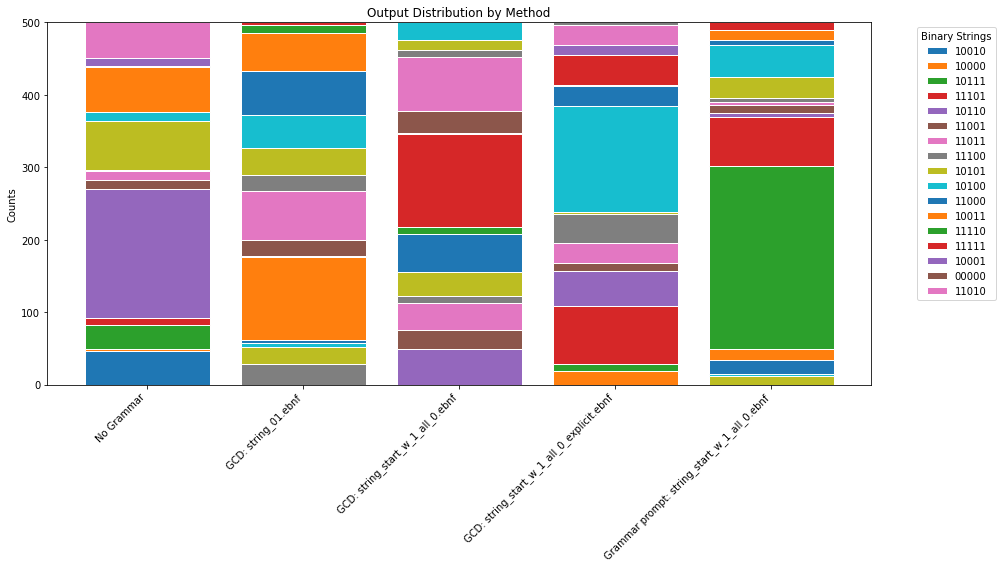

In [4]:
plot_outputs_method(outputs)

In [5]:
def plot_outputs_strings(outputs):
    # Prepare data for plotting
    labels = sorted(set(key for output in outputs.values() for key in output))  # Get all unique binary strings
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    for i, (method, output) in enumerate(outputs.items()):
        values = [output.get(key, 0) for key in labels]
        rects = ax.bar(x + i*width, values, width, label=method)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title('Counts by binary string and method')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels to prevent overlap
    ax.legend()
    
    plt.tight_layout()
    plt.show()

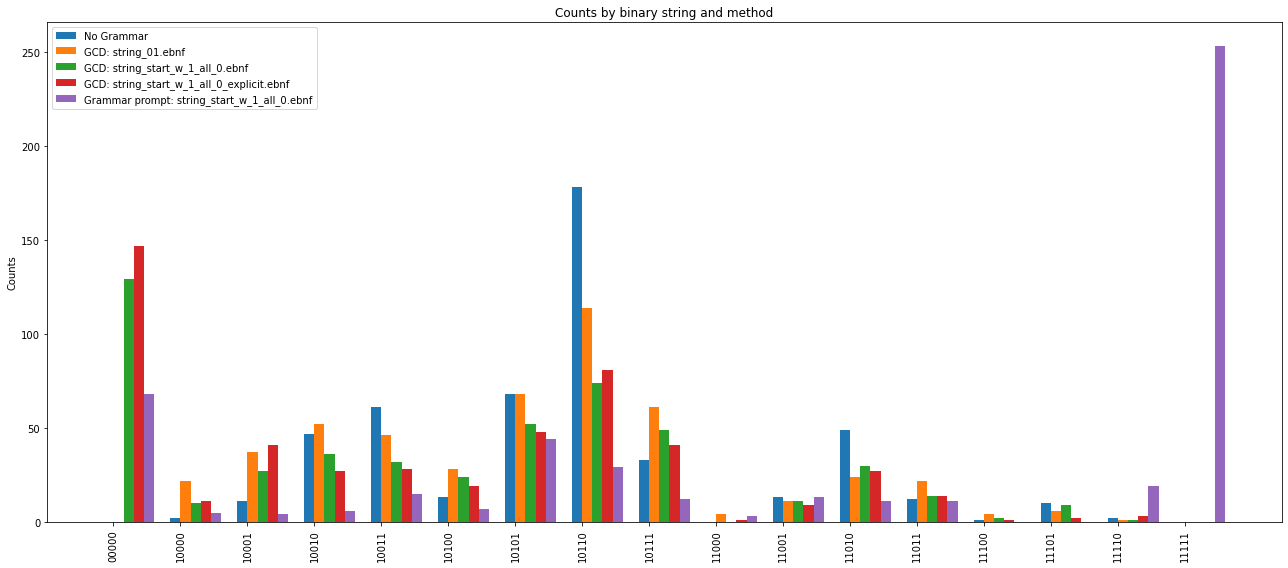

In [6]:
plot_outputs_strings(outputs)